## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  90.433161  1231.271576  0.229196  2.366648  1.343608
1  24.585379   614.841556  0.063021  9.802082  1.010579
2  49.488712  1522.035108  0.142255  1.169683  1.482919
3  98.880776  1707.627341  0.373301  5.635162  1.381265
4   7.570134   859.671999  0.008307  2.740078  0.813899


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.01807 | train_mse: 11.86507| train_mae: 2.03096 |  0:00:00s
epoch 1  | loss: 0.88128 | train_mse: 4.69416 | train_mae: 1.45715 |  0:00:00s
epoch 2  | loss: 0.3981  | train_mse: 1.66319 | train_mae: 0.95877 |  0:00:00s


epoch 3  | loss: 0.57976 | train_mse: 2.49227 | train_mae: 1.02535 |  0:00:00s
epoch 4  | loss: 0.50674 | train_mse: 1.91026 | train_mae: 0.90954 |  0:00:00s
epoch 5  | loss: 0.40567 | train_mse: 1.10365 | train_mae: 0.69921 |  0:00:00s
epoch 6  | loss: 0.32675 | train_mse: 0.5347  | train_mae: 0.57533 |  0:00:00s


epoch 7  | loss: 0.53487 | train_mse: 0.42328 | train_mae: 0.5137  |  0:00:00s
epoch 8  | loss: 0.32531 | train_mse: 0.61845 | train_mae: 0.58413 |  0:00:00s
epoch 9  | loss: 0.38161 | train_mse: 1.41886 | train_mae: 0.78986 |  0:00:00s
epoch 10 | loss: 0.52952 | train_mse: 1.07907 | train_mae: 0.72676 |  0:00:00s


epoch 11 | loss: 0.46986 | train_mse: 0.49217 | train_mae: 0.49614 |  0:00:01s
epoch 12 | loss: 0.194   | train_mse: 0.36166 | train_mae: 0.38987 |  0:00:01s
epoch 13 | loss: 0.34247 | train_mse: 0.23168 | train_mae: 0.34311 |  0:00:01s


epoch 14 | loss: 0.27862 | train_mse: 0.38299 | train_mae: 0.43726 |  0:00:01s
epoch 15 | loss: 0.30871 | train_mse: 0.42477 | train_mae: 0.46748 |  0:00:01s
epoch 16 | loss: 0.25116 | train_mse: 0.44504 | train_mae: 0.44751 |  0:00:01s
epoch 17 | loss: 0.25497 | train_mse: 0.44561 | train_mae: 0.44972 |  0:00:01s


epoch 18 | loss: 0.24413 | train_mse: 0.4061  | train_mae: 0.42973 |  0:00:01s
epoch 19 | loss: 0.24555 | train_mse: 0.40236 | train_mae: 0.42189 |  0:00:01s
epoch 20 | loss: 0.23573 | train_mse: 0.2867  | train_mae: 0.36317 |  0:00:01s
epoch 21 | loss: 0.22165 | train_mse: 0.36123 | train_mae: 0.42887 |  0:00:01s


epoch 22 | loss: 0.36413 | train_mse: 0.25318 | train_mae: 0.3877  |  0:00:01s
epoch 23 | loss: 0.28666 | train_mse: 0.21758 | train_mae: 0.34324 |  0:00:01s
epoch 24 | loss: 0.15081 | train_mse: 0.25549 | train_mae: 0.34792 |  0:00:01s
epoch 25 | loss: 0.17211 | train_mse: 0.29611 | train_mae: 0.38476 |  0:00:01s


epoch 26 | loss: 0.12972 | train_mse: 0.31048 | train_mae: 0.39994 |  0:00:02s
epoch 27 | loss: 0.18035 | train_mse: 0.22968 | train_mae: 0.35005 |  0:00:02s
epoch 28 | loss: 0.20589 | train_mse: 0.19841 | train_mae: 0.32921 |  0:00:02s


epoch 29 | loss: 0.26051 | train_mse: 0.15167 | train_mae: 0.29569 |  0:00:02s
epoch 30 | loss: 0.12946 | train_mse: 0.1428  | train_mae: 0.2932  |  0:00:02s
epoch 31 | loss: 0.3209  | train_mse: 0.18074 | train_mae: 0.31267 |  0:00:02s


epoch 32 | loss: 0.22715 | train_mse: 0.12711 | train_mae: 0.27501 |  0:00:02s
epoch 33 | loss: 0.25067 | train_mse: 0.10857 | train_mae: 0.25904 |  0:00:02s
epoch 34 | loss: 0.15071 | train_mse: 0.14613 | train_mae: 0.29138 |  0:00:02s


epoch 35 | loss: 0.14282 | train_mse: 0.31411 | train_mae: 0.41935 |  0:00:02s
epoch 36 | loss: 0.15363 | train_mse: 0.26079 | train_mae: 0.38571 |  0:00:02s
epoch 37 | loss: 0.29938 | train_mse: 0.15404 | train_mae: 0.30046 |  0:00:02s
epoch 38 | loss: 0.13278 | train_mse: 0.12919 | train_mae: 0.27208 |  0:00:02s


epoch 39 | loss: 0.19394 | train_mse: 0.09915 | train_mae: 0.23406 |  0:00:02s
epoch 40 | loss: 0.17839 | train_mse: 0.11828 | train_mae: 0.26427 |  0:00:03s
epoch 41 | loss: 0.3152  | train_mse: 0.24533 | train_mae: 0.32872 |  0:00:03s


epoch 42 | loss: 0.18187 | train_mse: 0.25077 | train_mae: 0.32412 |  0:00:03s
epoch 43 | loss: 0.34893 | train_mse: 0.27763 | train_mae: 0.35337 |  0:00:03s
epoch 44 | loss: 0.16129 | train_mse: 0.2446  | train_mae: 0.32648 |  0:00:03s


epoch 45 | loss: 0.11973 | train_mse: 0.24325 | train_mae: 0.31502 |  0:00:03s
epoch 46 | loss: 0.18029 | train_mse: 0.2625  | train_mae: 0.3132  |  0:00:03s
epoch 47 | loss: 0.23199 | train_mse: 0.28012 | train_mae: 0.32173 |  0:00:03s


epoch 48 | loss: 0.12425 | train_mse: 0.25589 | train_mae: 0.31348 |  0:00:03s
epoch 49 | loss: 0.18775 | train_mse: 0.12539 | train_mae: 0.25867 |  0:00:03s
epoch 50 | loss: 0.24843 | train_mse: 0.11001 | train_mae: 0.26724 |  0:00:03s


epoch 51 | loss: 0.14293 | train_mse: 0.11017 | train_mae: 0.25955 |  0:00:03s
epoch 52 | loss: 0.35054 | train_mse: 0.08106 | train_mae: 0.2318  |  0:00:03s
epoch 53 | loss: 0.11403 | train_mse: 0.08732 | train_mae: 0.24186 |  0:00:04s


epoch 54 | loss: 0.09595 | train_mse: 0.10593 | train_mae: 0.25322 |  0:00:04s
epoch 55 | loss: 0.12836 | train_mse: 0.0985  | train_mae: 0.25328 |  0:00:04s


epoch 56 | loss: 0.14357 | train_mse: 0.12047 | train_mae: 0.28937 |  0:00:04s
epoch 57 | loss: 0.11068 | train_mse: 0.06491 | train_mae: 0.21816 |  0:00:04s
epoch 58 | loss: 0.11032 | train_mse: 0.05969 | train_mae: 0.20201 |  0:00:04s


epoch 59 | loss: 0.11818 | train_mse: 0.06009 | train_mae: 0.19934 |  0:00:04s


epoch 60 | loss: 0.1662  | train_mse: 0.06333 | train_mae: 0.19841 |  0:00:05s


epoch 61 | loss: 0.12324 | train_mse: 0.07085 | train_mae: 0.20042 |  0:00:05s
epoch 62 | loss: 0.17907 | train_mse: 0.07291 | train_mae: 0.21031 |  0:00:05s
epoch 63 | loss: 0.13575 | train_mse: 0.08518 | train_mae: 0.23127 |  0:00:05s


epoch 64 | loss: 0.13817 | train_mse: 0.08114 | train_mae: 0.21256 |  0:00:05s
epoch 65 | loss: 0.14945 | train_mse: 0.08362 | train_mae: 0.21347 |  0:00:05s
epoch 66 | loss: 0.17949 | train_mse: 0.10398 | train_mae: 0.24362 |  0:00:05s
epoch 67 | loss: 0.07222 | train_mse: 0.09796 | train_mae: 0.23556 |  0:00:05s


epoch 68 | loss: 0.11225 | train_mse: 0.09241 | train_mae: 0.22225 |  0:00:05s
epoch 69 | loss: 0.20684 | train_mse: 0.11885 | train_mae: 0.24248 |  0:00:05s
epoch 70 | loss: 0.1854  | train_mse: 0.12326 | train_mae: 0.24102 |  0:00:05s
epoch 71 | loss: 0.1243  | train_mse: 0.11376 | train_mae: 0.22238 |  0:00:05s


epoch 72 | loss: 0.14682 | train_mse: 0.11236 | train_mae: 0.22352 |  0:00:06s
epoch 73 | loss: 0.11885 | train_mse: 0.12256 | train_mae: 0.25319 |  0:00:06s
epoch 74 | loss: 0.09124 | train_mse: 0.12841 | train_mae: 0.26222 |  0:00:06s


epoch 75 | loss: 0.17495 | train_mse: 0.14724 | train_mae: 0.2684  |  0:00:06s
epoch 76 | loss: 0.10967 | train_mse: 0.1154  | train_mae: 0.24572 |  0:00:06s
epoch 77 | loss: 0.11625 | train_mse: 0.0842  | train_mae: 0.21069 |  0:00:06s
epoch 78 | loss: 0.11847 | train_mse: 0.0901  | train_mae: 0.22275 |  0:00:06s


epoch 79 | loss: 0.10132 | train_mse: 0.07788 | train_mae: 0.22356 |  0:00:06s
epoch 80 | loss: 0.17795 | train_mse: 0.07023 | train_mae: 0.21248 |  0:00:06s
epoch 81 | loss: 0.07324 | train_mse: 0.06631 | train_mae: 0.20341 |  0:00:06s
epoch 82 | loss: 0.08686 | train_mse: 0.05184 | train_mae: 0.17454 |  0:00:06s


epoch 83 | loss: 0.11033 | train_mse: 0.05589 | train_mae: 0.18371 |  0:00:06s
epoch 84 | loss: 0.09207 | train_mse: 0.06757 | train_mae: 0.19991 |  0:00:06s
epoch 85 | loss: 0.12363 | train_mse: 0.08611 | train_mae: 0.21533 |  0:00:06s
epoch 86 | loss: 0.12553 | train_mse: 0.09677 | train_mae: 0.22928 |  0:00:07s


epoch 87 | loss: 0.07579 | train_mse: 0.09734 | train_mae: 0.23101 |  0:00:07s
epoch 88 | loss: 0.15685 | train_mse: 0.11423 | train_mae: 0.2548  |  0:00:07s
epoch 89 | loss: 0.11152 | train_mse: 0.07527 | train_mae: 0.21372 |  0:00:07s


epoch 90 | loss: 0.07076 | train_mse: 0.05516 | train_mae: 0.19652 |  0:00:07s
epoch 91 | loss: 0.15995 | train_mse: 0.05728 | train_mae: 0.20182 |  0:00:07s
epoch 92 | loss: 0.16644 | train_mse: 0.05713 | train_mae: 0.20431 |  0:00:07s
epoch 93 | loss: 0.1771  | train_mse: 0.05326 | train_mae: 0.18898 |  0:00:07s


epoch 94 | loss: 0.108   | train_mse: 0.04871 | train_mae: 0.18155 |  0:00:07s
epoch 95 | loss: 0.09212 | train_mse: 0.046   | train_mae: 0.17431 |  0:00:07s
epoch 96 | loss: 0.07586 | train_mse: 0.04636 | train_mae: 0.1679  |  0:00:07s


epoch 97 | loss: 0.23278 | train_mse: 0.06236 | train_mae: 0.19689 |  0:00:07s
epoch 98 | loss: 0.0694  | train_mse: 0.06082 | train_mae: 0.1895  |  0:00:07s
epoch 99 | loss: 0.12297 | train_mse: 0.05793 | train_mae: 0.1873  |  0:00:07s
epoch 100| loss: 0.0928  | train_mse: 0.04583 | train_mae: 0.18125 |  0:00:07s
epoch 101| loss: 0.18155 | train_mse: 0.04916 | train_mae: 0.18528 |  0:00:08s


epoch 102| loss: 0.09818 | train_mse: 0.0536  | train_mae: 0.19181 |  0:00:08s
epoch 103| loss: 0.08848 | train_mse: 0.09198 | train_mae: 0.24227 |  0:00:08s
epoch 104| loss: 0.08332 | train_mse: 0.08215 | train_mae: 0.21102 |  0:00:08s


epoch 105| loss: 0.06856 | train_mse: 0.07566 | train_mae: 0.20157 |  0:00:08s
epoch 106| loss: 0.14586 | train_mse: 0.06231 | train_mae: 0.19955 |  0:00:08s
epoch 107| loss: 0.05638 | train_mse: 0.05294 | train_mae: 0.18112 |  0:00:08s
epoch 108| loss: 0.0728  | train_mse: 0.0503  | train_mae: 0.17689 |  0:00:08s


epoch 109| loss: 0.17388 | train_mse: 0.05027 | train_mae: 0.17788 |  0:00:08s
epoch 110| loss: 0.11407 | train_mse: 0.04617 | train_mae: 0.17303 |  0:00:08s
epoch 111| loss: 0.14992 | train_mse: 0.04563 | train_mae: 0.17099 |  0:00:08s
epoch 112| loss: 0.08809 | train_mse: 0.04357 | train_mae: 0.16629 |  0:00:08s


epoch 113| loss: 0.061   | train_mse: 0.06642 | train_mae: 0.1965  |  0:00:08s
epoch 114| loss: 0.08607 | train_mse: 0.06494 | train_mae: 0.19535 |  0:00:08s
epoch 115| loss: 0.16683 | train_mse: 0.05581 | train_mae: 0.18832 |  0:00:08s
epoch 116| loss: 0.05982 | train_mse: 0.05783 | train_mae: 0.18977 |  0:00:09s


epoch 117| loss: 0.07653 | train_mse: 0.05484 | train_mae: 0.18432 |  0:00:09s
epoch 118| loss: 0.10807 | train_mse: 0.04843 | train_mae: 0.17387 |  0:00:09s
epoch 119| loss: 0.10181 | train_mse: 0.04588 | train_mae: 0.1711  |  0:00:09s
epoch 120| loss: 0.11916 | train_mse: 0.0591  | train_mae: 0.18968 |  0:00:09s


epoch 121| loss: 0.13841 | train_mse: 0.05646 | train_mae: 0.18334 |  0:00:09s
epoch 122| loss: 0.08233 | train_mse: 0.05959 | train_mae: 0.18119 |  0:00:09s
epoch 123| loss: 0.19215 | train_mse: 0.05994 | train_mae: 0.18427 |  0:00:09s
epoch 124| loss: 0.18616 | train_mse: 0.04574 | train_mae: 0.16632 |  0:00:09s


epoch 125| loss: 0.09151 | train_mse: 0.04063 | train_mae: 0.16    |  0:00:09s
epoch 126| loss: 0.17506 | train_mse: 0.04339 | train_mae: 0.16671 |  0:00:09s
epoch 127| loss: 0.09315 | train_mse: 0.04265 | train_mae: 0.1622  |  0:00:09s
epoch 128| loss: 0.11615 | train_mse: 0.04918 | train_mae: 0.17161 |  0:00:09s


epoch 129| loss: 0.12256 | train_mse: 0.04977 | train_mae: 0.17058 |  0:00:09s
epoch 130| loss: 0.06715 | train_mse: 0.04262 | train_mae: 0.16169 |  0:00:09s
epoch 131| loss: 0.11187 | train_mse: 0.04058 | train_mae: 0.16182 |  0:00:10s
epoch 132| loss: 0.23629 | train_mse: 0.04414 | train_mae: 0.16934 |  0:00:10s


epoch 133| loss: 0.12373 | train_mse: 0.03884 | train_mae: 0.15593 |  0:00:10s
epoch 134| loss: 0.06792 | train_mse: 0.0425  | train_mae: 0.16296 |  0:00:10s
epoch 135| loss: 0.05336 | train_mse: 0.04499 | train_mae: 0.17368 |  0:00:10s
epoch 136| loss: 0.10375 | train_mse: 0.04197 | train_mae: 0.16698 |  0:00:10s


epoch 137| loss: 0.07027 | train_mse: 0.04935 | train_mae: 0.18029 |  0:00:10s
epoch 138| loss: 0.09779 | train_mse: 0.03936 | train_mae: 0.15787 |  0:00:10s
epoch 139| loss: 0.07689 | train_mse: 0.04089 | train_mae: 0.15821 |  0:00:10s


epoch 140| loss: 0.07816 | train_mse: 0.0479  | train_mae: 0.17304 |  0:00:10s
epoch 141| loss: 0.06889 | train_mse: 0.03943 | train_mae: 0.16144 |  0:00:10s
epoch 142| loss: 0.05732 | train_mse: 0.04326 | train_mae: 0.16483 |  0:00:10s
epoch 143| loss: 0.094   | train_mse: 0.04442 | train_mae: 0.16992 |  0:00:10s


epoch 144| loss: 0.08213 | train_mse: 0.04497 | train_mae: 0.16973 |  0:00:10s
epoch 145| loss: 0.06396 | train_mse: 0.04414 | train_mae: 0.16473 |  0:00:11s
epoch 146| loss: 0.23069 | train_mse: 0.0457  | train_mae: 0.16622 |  0:00:11s


epoch 147| loss: 0.0967  | train_mse: 0.04653 | train_mae: 0.17593 |  0:00:11s
epoch 148| loss: 0.08929 | train_mse: 0.04507 | train_mae: 0.16986 |  0:00:11s


epoch 149| loss: 0.16666 | train_mse: 0.03693 | train_mae: 0.14942 |  0:00:11s
epoch 150| loss: 0.07896 | train_mse: 0.05649 | train_mae: 0.18365 |  0:00:11s
epoch 151| loss: 0.17662 | train_mse: 0.05331 | train_mae: 0.17844 |  0:00:11s


epoch 152| loss: 0.09056 | train_mse: 0.05897 | train_mae: 0.18637 |  0:00:11s
epoch 153| loss: 0.10203 | train_mse: 0.06765 | train_mae: 0.19289 |  0:00:11s
epoch 154| loss: 0.08893 | train_mse: 0.07127 | train_mae: 0.1944  |  0:00:11s
epoch 155| loss: 0.06422 | train_mse: 0.07727 | train_mae: 0.19608 |  0:00:11s


epoch 156| loss: 0.08404 | train_mse: 0.10006 | train_mae: 0.21115 |  0:00:11s
epoch 157| loss: 0.15537 | train_mse: 0.06394 | train_mae: 0.19488 |  0:00:11s
epoch 158| loss: 0.09358 | train_mse: 0.06302 | train_mae: 0.19498 |  0:00:12s
epoch 159| loss: 0.31032 | train_mse: 0.0699  | train_mae: 0.20364 |  0:00:12s


epoch 160| loss: 0.19513 | train_mse: 0.05082 | train_mae: 0.18241 |  0:00:12s
epoch 161| loss: 0.17644 | train_mse: 0.06183 | train_mae: 0.20282 |  0:00:12s
epoch 162| loss: 0.09595 | train_mse: 0.05467 | train_mae: 0.18698 |  0:00:12s
epoch 163| loss: 0.09697 | train_mse: 0.04737 | train_mae: 0.16599 |  0:00:12s


epoch 164| loss: 0.1141  | train_mse: 0.04545 | train_mae: 0.16442 |  0:00:12s
epoch 165| loss: 0.32524 | train_mse: 0.04908 | train_mae: 0.16348 |  0:00:12s
epoch 166| loss: 0.0943  | train_mse: 0.05164 | train_mae: 0.18244 |  0:00:12s
epoch 167| loss: 0.08429 | train_mse: 0.04674 | train_mae: 0.17959 |  0:00:12s


epoch 168| loss: 0.16326 | train_mse: 0.03832 | train_mae: 0.16147 |  0:00:12s
epoch 169| loss: 0.18903 | train_mse: 0.04687 | train_mae: 0.17421 |  0:00:12s
epoch 170| loss: 0.21021 | train_mse: 0.05027 | train_mae: 0.18303 |  0:00:12s
epoch 171| loss: 0.085   | train_mse: 0.05105 | train_mae: 0.18178 |  0:00:12s


epoch 172| loss: 0.07766 | train_mse: 0.05278 | train_mae: 0.18362 |  0:00:12s
epoch 173| loss: 0.18519 | train_mse: 0.08282 | train_mae: 0.21851 |  0:00:13s
epoch 174| loss: 0.05553 | train_mse: 0.10048 | train_mae: 0.22916 |  0:00:13s


epoch 175| loss: 0.07548 | train_mse: 0.14129 | train_mae: 0.26166 |  0:00:13s
epoch 176| loss: 0.08206 | train_mse: 0.19455 | train_mae: 0.30322 |  0:00:13s
epoch 177| loss: 0.0858  | train_mse: 0.31697 | train_mae: 0.36616 |  0:00:13s
epoch 178| loss: 0.06297 | train_mse: 0.27811 | train_mae: 0.32483 |  0:00:13s


epoch 179| loss: 0.14839 | train_mse: 0.19213 | train_mae: 0.269   |  0:00:13s
epoch 180| loss: 0.08175 | train_mse: 0.18597 | train_mae: 0.29805 |  0:00:13s
epoch 181| loss: 0.06001 | train_mse: 0.20967 | train_mae: 0.33815 |  0:00:13s
epoch 182| loss: 0.0818  | train_mse: 0.13668 | train_mae: 0.27028 |  0:00:13s


epoch 183| loss: 0.06495 | train_mse: 0.05367 | train_mae: 0.1776  |  0:00:13s
epoch 184| loss: 0.07732 | train_mse: 0.04724 | train_mae: 0.17173 |  0:00:13s
epoch 185| loss: 0.07602 | train_mse: 0.06531 | train_mae: 0.20248 |  0:00:13s
epoch 186| loss: 0.07314 | train_mse: 0.05686 | train_mae: 0.18486 |  0:00:13s


epoch 187| loss: 0.08868 | train_mse: 0.04833 | train_mae: 0.16684 |  0:00:13s
epoch 188| loss: 0.04964 | train_mse: 0.04242 | train_mae: 0.1619  |  0:00:14s
epoch 189| loss: 0.20781 | train_mse: 0.04517 | train_mae: 0.16747 |  0:00:14s


epoch 190| loss: 0.15749 | train_mse: 0.05386 | train_mae: 0.18068 |  0:00:14s
epoch 191| loss: 0.07365 | train_mse: 0.05607 | train_mae: 0.18681 |  0:00:14s
epoch 192| loss: 0.10447 | train_mse: 0.05537 | train_mae: 0.18863 |  0:00:14s
epoch 193| loss: 0.13988 | train_mse: 0.04116 | train_mae: 0.15477 |  0:00:14s


epoch 194| loss: 0.09022 | train_mse: 0.04732 | train_mae: 0.16308 |  0:00:14s
epoch 195| loss: 0.06338 | train_mse: 0.07638 | train_mae: 0.1961  |  0:00:14s
epoch 196| loss: 0.10431 | train_mse: 0.06738 | train_mae: 0.18191 |  0:00:14s
epoch 197| loss: 0.07446 | train_mse: 0.05549 | train_mae: 0.16181 |  0:00:14s


epoch 198| loss: 0.20673 | train_mse: 0.06662 | train_mae: 0.17411 |  0:00:14s
epoch 199| loss: 0.09196 | train_mse: 0.12596 | train_mae: 0.21715 |  0:00:14s

Early stopping occurred at epoch 199 with best_epoch = 149 and best_train_mae = 0.14942
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

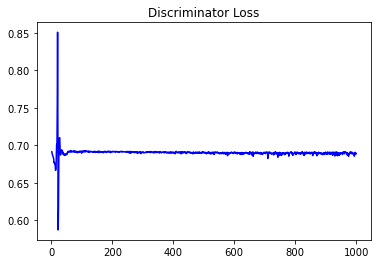

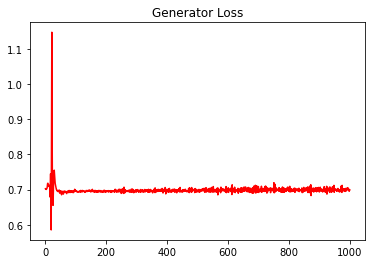

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4051009157163116


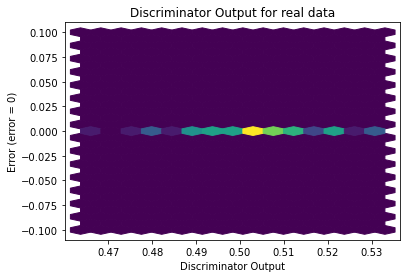

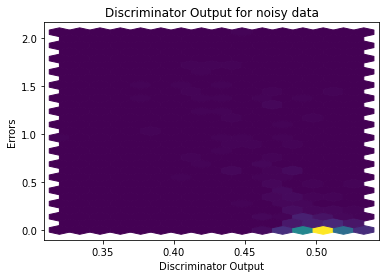

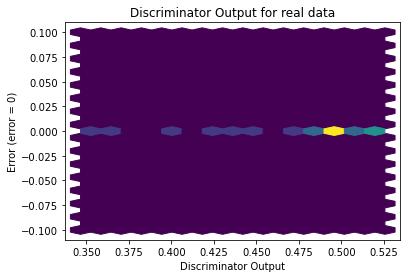

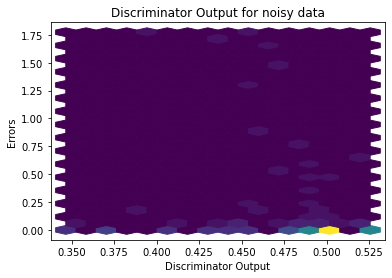

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


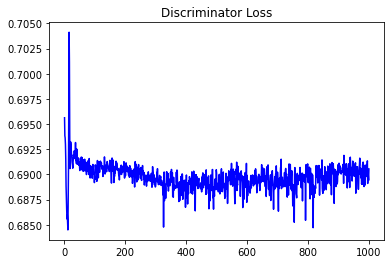

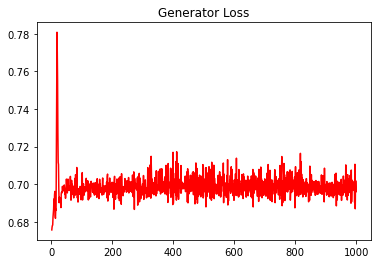

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1586167088860412


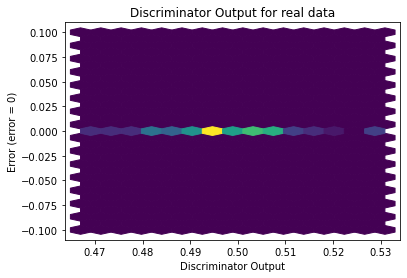

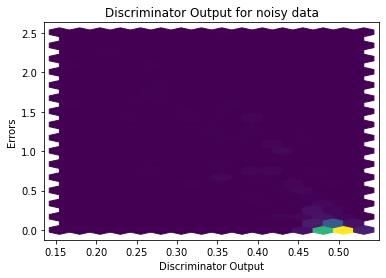

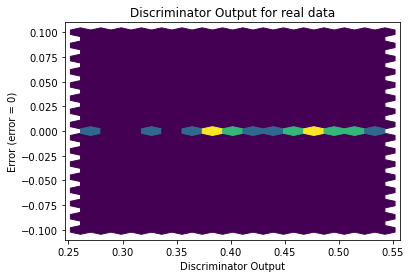

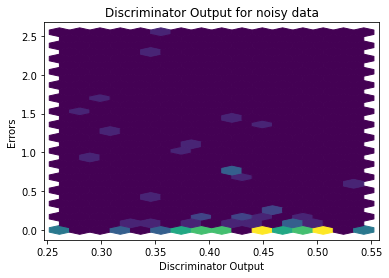

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9160]], requires_grad=True)
